## Classification with KNN

### Import the Libraries

In [1]:
import numpy as nm
import pandas as pd
import seaborn as seaborn_plot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings("ignore")

### Import the Dataset

In [2]:
abalone_data = pd.read_csv("file:///Users/amandeepkaur/Downloads/abalone.csv", 
names= ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 
'Shell_weight', 'Rings'])


In [3]:
#Divding the data to X and y sets.
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

In [4]:
#Encoding the data to deal with the categorical variable using OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), ['Sex'])], remainder = 'passthrough')
X = nm.array(ct.fit_transform(X))

# 1. Applying KNN using default parameters

In [5]:
#Splitting the dataset
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, random_state= 45)

In [6]:
#Feature Scaling
sc = StandardScaler()
X_train_d[:, 3:] = sc.fit_transform(X_train_d[:, 3:])
X_test_d[:, 3:] = sc.transform(X_test_d[:, 3:])

In [7]:
#Train the Model Using Default values
classifier = KNeighborsClassifier()
classifier.fit(X_train_d, y_train_d)
#Predict the model
y_pred_d = classifier.predict(X_test_d)
print("Accuracy : " + str(accuracy_score(y_test_d, y_pred_d)*100)+"%")
print("F1 Score : " + str(f1_score(y_pred_d, y_test_d, average = 'micro')*100)+"%")


Accuracy : 22.583732057416267%
F1 Score : 22.583732057416267%


# 2. Splitting the dataset into 80/20 ratio

In [8]:
#Splitting the dataset 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state= 29)

In [9]:
#Feature Scaling
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

# 3. KNN using 5 fold cross validation

In [10]:
k_values = range(1, 150)
k_accuracies = []

for k in k_values:
    accuracies = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring='accuracy')
    k_accuracies.append(accuracies.mean())

# 4. Plotting the mean validation accuracy vs. k across all folds.

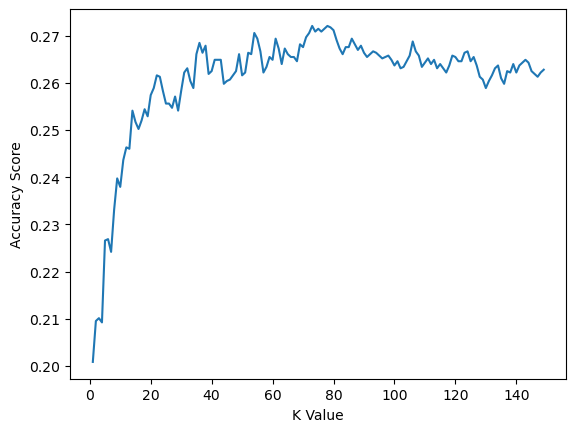

In [11]:
plt.plot(k_values, k_accuracies)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.show()

In [12]:
print("Maximum Accuracy : " + str(max(k_accuracies)*100))
print("K Value for maximum accuracy : " + str(nm.argmax(k_accuracies)+1))

Maximum Accuracy : 27.20693142862257
K Value for maximum accuracy : 73


# 5. Retrain the data with optimal value of K

In [13]:
#Train the Model Using optimal value of K
classifier = KNeighborsClassifier(n_neighbors = nm.argmax(k_accuracies)+1)
classifier.fit(X_train, y_train)
#Predict the model
y_pred = classifier.predict(X_test)
print("Accuracy : " + str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy : 25.0%


# 6. Improving on KNN

In [14]:
#Train the Model Using Wighted KNN
classifier = KNeighborsClassifier(n_neighbors = nm.argmax(k_accuracies)+1, weights='uniform', p=1)
classifier.fit(X_train, y_train)
#Predict the model
y_pred = classifier.predict(X_test)
print("Accuracy : " + str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy : 24.52153110047847%


In [15]:
#Train the Model Using Wighted KNN
classifier = KNeighborsClassifier(n_neighbors = nm.argmax(k_accuracies)+1, weights='distance', p=1)
classifier.fit(X_train, y_train)
#Predict the model
y_pred = classifier.predict(X_test)
print("Accuracy : " + str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy : 23.80382775119617%


In [16]:
#Train the Model Using Wighted KNN
classifier = KNeighborsClassifier(n_neighbors = nm.argmax(k_accuracies)+1, weights='distance', p=2)
classifier.fit(X_train, y_train)
#Predict the model
y_pred = classifier.predict(X_test)
print("Accuracy : " + str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy : 24.401913875598087%


In [27]:
def_accuracy = []
manh_acuuracy = []
eucl_accuracy = []

for k in k_values:
    # Default
    def_classifier = KNeighborsClassifier(n_neighbors=k)
    # Manhatten
    manh_classifier = KNeighborsClassifier(n_neighbors=k, p=1, weights="distance")
    # Euclidean
    eucl_classifier = KNeighborsClassifier(n_neighbors=k, p=2, weights="distance")

    def_classifier.fit(X_train, y_train)
    manh_classifier.fit(X_train, y_train)
    eucl_classifier.fit(X_train, y_train)

    y_pred_default = def_classifier.predict(X_test)
    y_pred_manh = manh_classifier.predict(X_test)
    y_pred_eucl = eucl_classifier.predict(X_test)

    def_scores = accuracy_score(y_test, y_pred_default)
    manh_scores = accuracy_score(y_test, y_pred_manh)
    eucl_scores = accuracy_score(y_test, y_pred_eucl)
    
    def_accuracy.append(def_scores)
    manh_acuuracy.append(manh_scores)
    eucl_accuracy.append(eucl_scores)

# Finding best accuracies of each scheme

max_def = max(def_accuracy)
max_manh = max(manh_acuuracy)
max_eucl = max(eucl_accuracy)


# Finding best accuracy 
best_acc = max([max_def, max_manh, max_eucl])

accuracy_final = max_def

if max_manh > accuracy_final:
  accuracy_final = max_manh
  best_k = man_acuuracy.index(max_manh)+1
if max_eucl > accuracy_final:
  accuracy_final = max_eucl
  best_k = eucl_accuracy.index(max_eucl)+1
    
accuracy_final*100


25.95693779904306

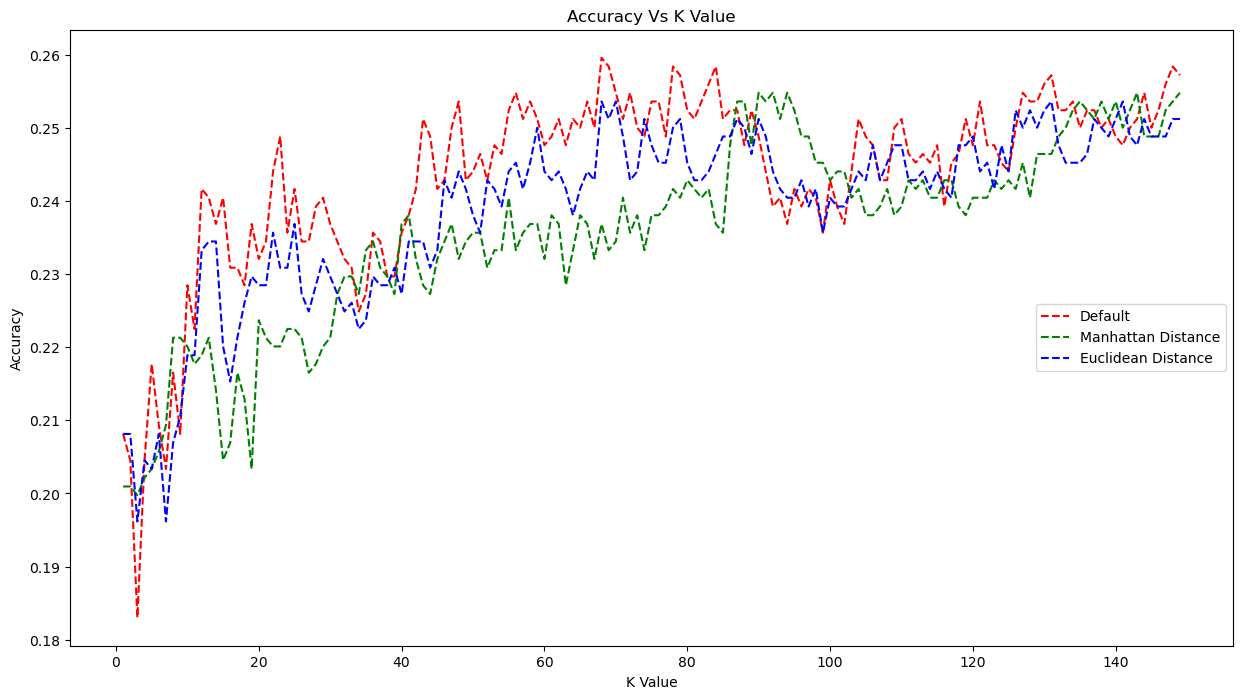

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(k_values, def_accuracy, color='red', linestyle='dashed')
ax.plot(k_values, manh_acuuracy, color='green', linestyle='dashed')
ax.plot(k_values, eucl_accuracy, color='blue', linestyle='dashed')

plt.title("Accuracy Vs K Value")
plt.xlabel('K Value')
plt.ylabel('Accuracy')

# ax.spines['left'].set_position(('data', 1))
ax.legend(['Default', 'Manhattan Distance', 'Euclidean Distance'], loc="center right")

As per the above graph, the best accuracy is observed for Default values distances of weighted knn, with the accuracy of 25.95% and for k = 73